In [ ]:
!pip install rebound==3.19.1
import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mplcolors
from matplotlib import rcParams

     |████████████████████████████████| 255 kB 4.4 MB/s 
  Created wheel for rebound: filename=rebound-3.19.1-cp37-cp37m-linux_x86_64.whl size=603778 sha256=bfabd79539de9886b71e4ee94bbd2a69a3e9bd7435e734900075e73f0da65885
  Stored in directory: /root/.cache/pip/wheels/e5/14/f3/584a4b6e77ed60a189ce431f59b427c878fc0ffdb83ecc3c8a
Successfully built rebound


In [ ]:
rcParams.update({'font.size': 22})
rcParams.update({'mathtext.fontset': 'cm'})

def get_semi(idx,beta,a_mo,M_i,M_p):
    M_tilde = M_p + idx*M_i
    X_m = 0.5*(2*M_i/(3*M_tilde))**(1./3.)
    return a_mo*((1.+beta*X_m)/(1-beta*X_m))**idx

def get_MA(idx):
    gold_ratio = (1.+np.sqrt(5.))/2.
    return float(idx)*360.*gold_ratio % 360.

def get_circle(r,phi):
    th = np.arange(phi,phi+2.*np.pi+0.01,0.01)
    return r*np.cos(th),r*np.sin(th)

def get_color(col):
    hexcolor = mplcolors.cnames[col]
    hexcolor = hexcolor.lstrip('#')
    lv = len(hexcolor)
    return tuple(int(hexcolor[i:i + lv // 3], 16)/255. for i in range(0, lv, lv // 3)) # tuple of rgb values

def get_trail(x,y,col='black', **kwargs):

    if "lw" not in kwargs:
        kwargs["lw"] = 1
    lw = kwargs["lw"]

    col = get_color(col)
    Npts = len(x)
    colors = np.zeros((Npts,4))
    colors[:,0:3] = col
    colors[:,3] = np.linspace(0,1,Npts)[::-1]
   
    segments = np.zeros((Npts-1,2,2))
    segments[:,0,0] = x[:-1]
    segments[:,0,1] = y[:-1]
    segments[:,1,0] = x[1:]
    segments[:,1,1] = y[1:]

    lc = LineCollection(segments, color=colors, **kwargs)
    return lc

0.0040017550187535665
0.010004387546883917


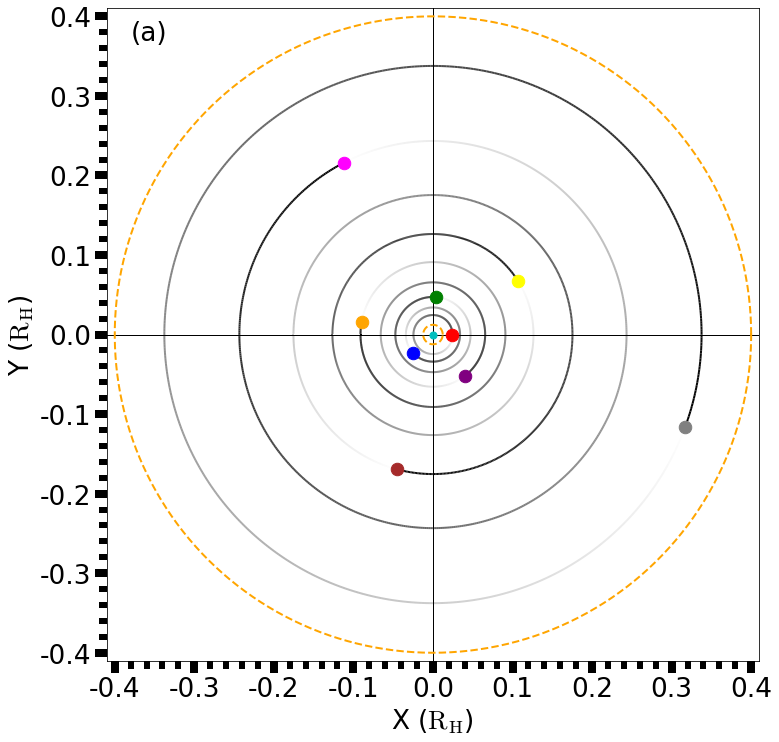

In [ ]:
M_star = 1.0
M_E = 3.0035e-6
M_moon = 0.00015*M_E #Ceres mass
#M_moon = 0.0022*M_E #Pluto mass
#M_moon = 4*1./81.*M_E # Luna mass

rho_moon = 2.08 #Ceres density (g/cc)
#rho_moon = 1.854  #Pluto density
#rho_moon = 3.3 #Luna density (g/cc)

#R_Roche = 2.44*4.26352e-5*(5.515/rho_moon)**(1./3.) # Ceres
#R_Roche = 2.44*4.26352e-5*(5.515/rho_moon)**(1./3.)  #Pluto Roche
R_Roche = 2.88*4.26352e-5  #luna
#print(R_Roche)

R_E = 4.26352e-5
#R_R = 2.44*R_E*(5.515/rho_moon)**(1./3.)
#print(R_R)

beta =7
fs = 'large'

R_H = 1.*((M_E+M_moon)/(3*M_star))**(1./3.)
print(0.4*R_H)
print(R_H)
n_moons = 9

sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('days','AU','Msun')

sim.add(m=M_E)

a_mo = 2.*R_Roche
#print(a_mo)
for i in range(0,n_moons):
    a_m = get_semi(i,beta,a_mo,M_moon,M_E)
    MA_m = get_MA(i)
    sim.add(m=M_moon,a = a_m,M=np.radians(MA_m))

ps = sim.particles

#fig, ax = rebound.OrbitPlot(sim,color=True,lw=3,figsize=(12,12))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

x_Roche,y_Roche = get_circle(R_Roche,0)
x_stab,y_stab = get_circle(0.4*R_H,0)


#plot Hill radius and Roche radius
ax.plot(x_Roche/R_H,y_Roche/R_H,'--',lw=2,color='orange')
ax.plot(x_stab/R_H,y_stab/R_H,'--',lw=2,color='orange')

ax.plot(0,0,'g*',ms=5)

col = ['r','b','g','purple','orange','yellow','brown','magenta','gray','gray']

for i in range(1,n_moons+1):
    #print(ps[i].a)
    x_moon,y_moon = get_circle(ps[i].a,np.arctan2(ps[i].y,ps[i].x)) 
    moon_orb = get_trail(x_moon/R_H,y_moon/R_H,'black',lw=2)
    ax.add_collection(moon_orb)
    #ax.plot(x_moon/R_H,y_moon/R_H,'-',color='gray',lw=3,alpha=alpha_val)

    ax.plot(ps[i].x/R_H,ps[i].y/R_H,'.',color=col[i-1],ms=25)

ax.scatter(0, 0, s=50, marker='o', color='c', zorder=3)
ax.text(-0.38,.37,'(a)',fontsize=fs)

ax.hlines(y=0.0, xmin=-.42, xmax=.42, linewidth=1, color='k')
ax.vlines(x=0.0, ymin=-.42, ymax=.42, linewidth=1, color='k')

ax.set_aspect(1)

ax.set_ylim(-0.41,0.41)
ax.set_xlim(-0.41,0.41)

ax.set_yticks([-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4])
ax.set_yticklabels(['-0.4','-0.3','-0.2','-0.1','0.0','0.1','0.2','0.3','0.4'])
ax.set_xticks([-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4])
ax.set_xticklabels(['-0.4','-0.3','-0.2','-0.1','0.0','0.1','0.2','0.3','0.4'])



ax.set_ylabel("Y ($\\rm R_{\\rm H}$)",fontsize=fs)
ax.set_xlabel("X ($\\rm R_{\\rm H}$)",fontsize=fs)

ax.minorticks_on()
ax.tick_params(which='major',axis='both', direction='out',length = 12.0, width = 8.0,labelsize=fs)
ax.tick_params(which='minor',axis='both', direction='out',length = 8.0, width = 6.0)
fname = "Ceres-mass-Orbits.png"
fig.savefig(fname,bbox_inches='tight',dpi=300)



# New Section

# New Section